In [3]:
import pandas as pd
df_animal = pd.read_csv("msleep.csv")
df_animal

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


Text(0.5, 0, 'Hours of Sleep')

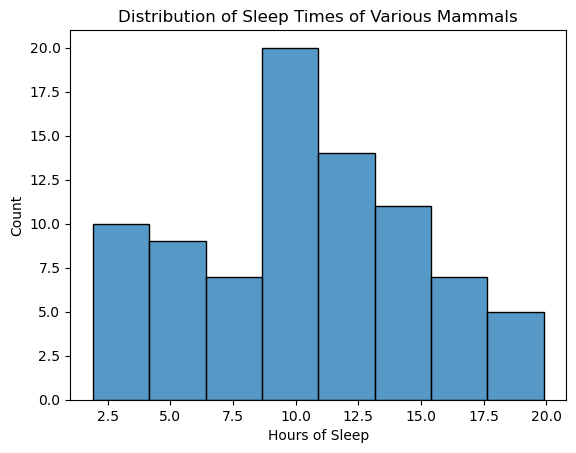

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_animal.sleep_total)
plt.title("Distribution of Sleep Times of Various Mammals")
plt.xlabel("Hours of Sleep")

In [5]:
df_animal.sleep_total.value_counts()

sleep_total
12.5    4
10.1    3
5.3     2
6.3     2
9.1     2
       ..
19.4    1
17.0    1
14.3    1
19.9    1
5.2     1
Name: count, Length: 65, dtype: int64

In [6]:
df_animal.vore.value_counts(dropna=False)

vore
herbi      32
omni       20
carni      19
NaN         7
insecti     5
Name: count, dtype: int64

In [7]:
df_animal.vore.mode()

0    herbi
Name: vore, dtype: object

In [8]:
df_animal[df_animal.vore == "insecti"]["sleep_rem"].agg(["mean", "median"])

mean      3.525
median    3.000
Name: sleep_rem, dtype: float64

In [5]:
range_sleep_total = df_animal['sleep_total'].max() - \
df_animal['sleep_total'].min()
range_sleep_total

18.0

In [9]:
import numpy as np
np.var(df_animal.sleep_total, ddof=1)

19.805677343520422

In [11]:
# Mean Absolute Deviation

dists = df_animal.sleep_total - \
np.mean(df_animal.sleep_total)
np.mean(np.abs(dists))

np.float64(3.5667005370881117)

In [12]:
# Finding Outliers

from scipy.stats import iqr

iqr = iqr(df_animal.bodywt)

lower_thereshold = np.quantile(df_animal.bodywt, 0.25) \
- 1.5 * iqr
upper_thereshold = np.quantile(df_animal.bodywt, 0.75) \
+ 1.5 * iqr

df_animal[(df_animal.bodywt < lower_thereshold) | (df_animal.bodywt > upper_thereshold)]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.423,600.000
20,Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NaN,NaN,20.10,4.603,2547.000
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.10,0.655,521.000
23,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,NaN,20.90,0.419,187.000
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.70,5.712,6654.000
50,Tiger,Panthera,carni,Carnivora,en,15.8,NaN,NaN,8.20,NaN,162.564
52,Lion,Panthera,carni,Carnivora,vu,13.5,NaN,NaN,10.50,NaN,161.499
76,Brazilian tapir,Tapirus,herbi,Perissodactyla,vu,4.4,1.0,0.900000,19.60,0.169,207.501


<Axes: ylabel='bodywt'>

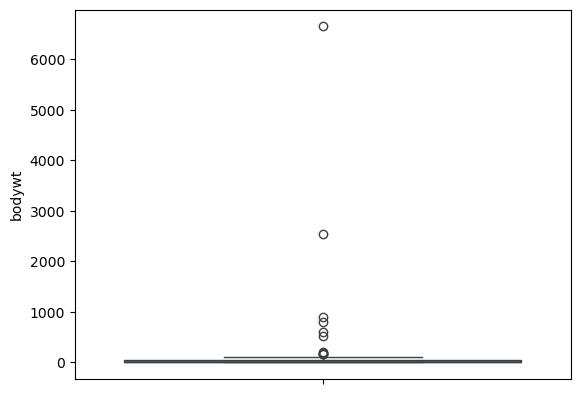

In [13]:
import seaborn as sns

sns.boxplot(data=df_animal, y='bodywt')

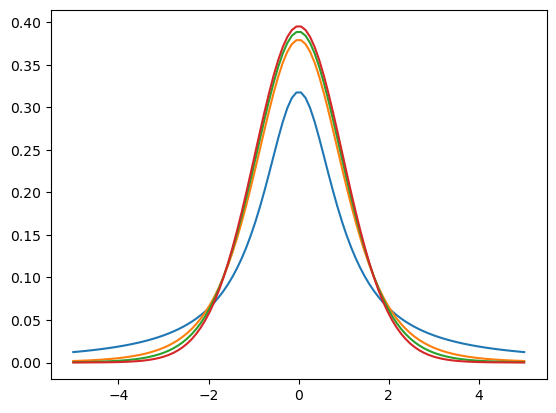

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

x = np.linspace(-5, 5, 100) 
# Farklı serbestlik dereceleri (df) için eğrileri çizdirme
for df in [1, 5, 10, 30]:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

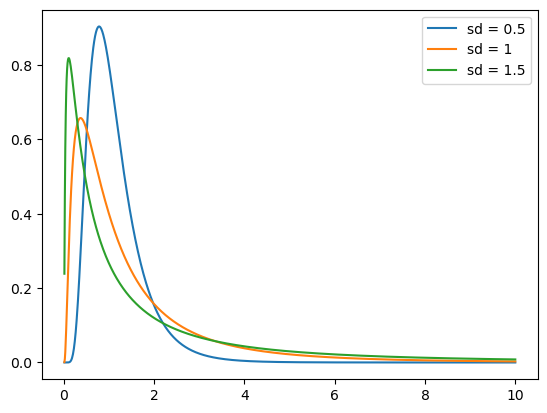

In [2]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

x = np.linspace(0.01, 10, 1000)
# Farklı 's' (standart sapma) değerleri için döngü
for s in [0.5, 1, 1.5]:
    # scale=np.exp(0) yani scale=1 alınmış (altta yatan normal dağılımın ortalaması 0)
    pdf = lognorm.pdf(x, s=s, scale=np.exp(0))
    plt.plot(x, pdf, label=f'sd = {s}')

plt.legend()
plt.show()

In [3]:
import pandas as pd
import yfinance as yf
from scipy.stats import f_oneway  # ANOVA testi için
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Tukey testi için

# --- 1. Veri Çekme (Bitcoin, Nasdaq, Altın) ---
# Son 2 yılın günlük verilerini çekelim
tickers = ['BTC-USD', 'QQQ', 'GLD']

# HATA DÜZELTMESİ:
# 'Adj Close' yerine 'Close' kullanıyoruz, çünkü yfinance
# artık varsayılan olarak düzeltilmiş fiyatları 'Close' sütununa yazıyor.
data = yf.download(tickers, period='2y')['Close']

# --- 2. Veri Hazırlama (Günlük Getirileri Hesapla) ---
# pct_change() ile günlük yüzdesel değişimi (getiriyi) hesapla
returns = data.pct_change()

# İlk satır NaN (boş) olacağı için onu atalım
returns = returns.dropna()

# --- 3. ADIM: ANOVA (Genel Fark Var Mı?) ---
# f_oneway fonksiyonu her bir grubun verisini ayrı ayrı ister
anova_result = f_oneway(
    returns['BTC-USD'].dropna(),
    returns['QQQ'].dropna(),
    returns['GLD'].dropna()
)

print("--- ANOVA TEST SONUCU ---")
print(f"F-İstatistiği: {anova_result.statistic:.4f}")
print(f"P-Değeri: {anova_result.pvalue:.4f}")
print("-" * 30)

# --- 4. ADIM: POST-HOC (Tukey HSD) Testi (Eğer fark varsa) ---
# Eğer p-değeri 0.05'ten küçükse (anlamlı bir fark varsa)
if anova_result.pvalue < 0.05:
    print("ANOVA: Anlamlı bir fark bulundu! (p < 0.05)")
    print("Tukey HSD testi ile gruplar karşılaştırılıyor...\n")

    # Tukey testi veriyi "uzun" formatta ister (değer ve grup ismi yanyana)
    long_data = returns.stack().reset_index()
    long_data.columns = ['Date', 'Ticker', 'Return']

    # Tukey Testini çalıştır
    tukey_result = pairwise_tukeyhsd(
        endog=long_data['Return'],  # Değerlerin olduğu sütun
        groups=long_data['Ticker'], # Grupların olduğu sütun
        alpha=0.05  # Anlamlılık düzeyi
    )

    # Sonuçları yazdır
    print(tukey_result)

else:
    print("ANOVA: Grupların ortalama getirileri arasında anlamlı bir fark bulunamadı. (p > 0.05)")

/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_2721/2068434432.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='2y')['Close']
[*********************100%***********************]  3 of 3 completed

--- ANOVA TEST SONUCU ---
F-İstatistiği: 0.6493
P-Değeri: 0.5225
------------------------------
ANOVA: Grupların ortalama getirileri arasında anlamlı bir fark bulunamadı. (p > 0.05)



/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_2721/2068434432.py:17: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change()


In [4]:
!pip install yfinance


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import chi2_contingency # Ki-Kare testi fonksiyonu

print("Veriler çekiliyor...")
# --- 1. Veri Çekme (Bitcoin ve Nasdaq) ---
tickers = ['BTC-USD', 'QQQ']
data = yf.download(tickers, period='2y')['Close']

print("Veriler işleniyor...")
# --- 2. Veri Hazırlama (Kategorik Veri Oluşturma) ---
# Günlük getirileri hesapla
returns = data.pct_change().dropna()

# Getirileri kategorik veriye dönüştür: 'Up' (Yükseldi) veya 'Down' (Düştü)
returns['BTC_Move'] = np.where(returns['BTC-USD'] > 0, 'Up', 'Down')
returns['QQQ_Move'] = np.where(returns['QQQ'] > 0, 'Up', 'Down')

# --- 3. Kontenjans Tablosu (Gözlenen Frekanslar) ---
# Ki-Kare testi için iki kategorik değişkenin frekans tablosunu (crosstab) oluştururuz.
contingency_table = pd.crosstab(returns['BTC_Move'], returns['QQQ_Move'])

print("--- Gözlenen Frekanslar (Kontenjans Tablosu) ---")
print(contingency_table)
print("\n" + "-" * 30 + "\n")

# --- 4. Ki-Kare Bağımsızlık Testi ---
# H0: Bitcoin ve Nasdaq hareketleri bağımsızdır (ilişkisizdir).
# H1: Bitcoin ve Nasdaq hareketleri bağımlıdır (ilişkilidir).

chi2_stat, p_value, dof, expected_freqs = chi2_contingency(contingency_table)

print("--- Ki-Kare (Chi-Squared) Test Sonuçları ---")
print(f"Ki-Kare İstatistiği: {chi2_stat:.4f}")
print(f"P-Değeri: {p_value:.4f}")
print(f"Serbestlik Derecesi (dof): {dof}")
print("\n" + "-" * 30 + "\n")

# --- 5. Sonucun Yorumlanması ---
alpha = 0.05
print(f"Anlamlılık Düzeyi (alpha): {alpha}")
if p_value < alpha:
    print(f"Karar (p = {p_value:.4f}): H0 REDDEDİLDİ.")
    print("Yorum: Bitcoin ve Nasdaq'ın günlük hareketleri (yükseliş/düşüş) arasında istatistiksel olarak ANLAMLI BİR İLİŞKİ (BAĞIMLILIK) VARDIR.")
else:
    print(f"Karar (p = {p_value:.4f}): H0 REDDEDİLEMEZ.")
    print("Yorum: Bitcoin ve Nasdaq'ın günlük hareketleri arasında anlamlı bir ilişki bulunamadı (BAĞIMSIZDIRLAR).")

Veriler çekiliyor...


/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_2721/3398424039.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='2y')['Close']
[*********************100%***********************]  2 of 2 completed

Veriler işleniyor...
--- Gözlenen Frekanslar (Kontenjans Tablosu) ---
QQQ_Move  Down   Up
BTC_Move           
Down       234  119
Up         203  175

------------------------------

--- Ki-Kare (Chi-Squared) Test Sonuçları ---
Ki-Kare İstatistiği: 11.5071
P-Değeri: 0.0007
Serbestlik Derecesi (dof): 1

------------------------------

Anlamlılık Düzeyi (alpha): 0.05
Karar (p = 0.0007): H0 REDDEDİLDİ.
Yorum: Bitcoin ve Nasdaq'ın günlük hareketleri (yükseliş/düşüş) arasında istatistiksel olarak ANLAMLI BİR İLİŞKİ (BAĞIMLILIK) VARDIR.



/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_2721/3398424039.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import chi2_contingency # Ki-Kare testi fonksiyonu

print("Son 5 yıllık veriler çekiliyor...")
# --- 1. Veri Çekme (Bitcoin ve Nasdaq) ---
tickers = ['BTC-USD', 'QQQ'] # QQQ, Nasdaq-100 endeksini temsil eden ETF'tir
# '5y' parametresi ile son 5 yıllık veriyi çekiyoruz
data = yf.download(tickers, period='5y')['Close']

print("Veriler işleniyor...")
# --- 2. Veri Hazırlama (Kategorik Veri Oluşturma) ---
# Günlük getirileri (yüzdesel değişim) hesapla
returns = data.pct_change().dropna()

# Getirileri kategorik veriye dönüştür: 'Up' (Yükseldi) veya 'Down' (Düştü)
# np.where(koşul, doğruysa_bunu_yap, yanlışsa_bunu_yap)
returns['BTC_Move'] = np.where(returns['BTC-USD'] > 0, 'Up', 'Down')
returns['QQQ_Move'] = np.where(returns['QQQ'] > 0, 'Up', 'Down')

# --- 3. Kontenjans Tablosu (Gözlenen Frekanslar) ---
# Ki-Kare testi için iki kategorik değişkenin frekans tablosunu (crosstab) oluştururuz.
contingency_table = pd.crosstab(returns['BTC_Move'], returns['QQQ_Move'])

print("\n" + "--- GÖZLENEN FREKANSLAR (KONTENJANS TABLOSU) ---")
print(contingency_table)
print("\n" + "-" * 40 + "\n")

# --- 4. Ki-Kare Bağımsızlık Testi ---
# H0: Bitcoin ve Nasdaq hareketleri bağımsızdır (ilişkisizdir).
# H1: Bitcoin ve Nasdaq hareketleri bağımlıdır (ilişkilidir).

# chi2_contingency fonksiyonu 4 önemli değer döndürür:
# chi2_stat: Test istatistiği
# p_value: P-değeri (Bizim için en önemlisi bu)
# dof: Serbestlik derecesi
# expected_freqs: Eğer H0 doğru olsaydı (bağımsız olsalardı) beklenen frekanslar
chi2_stat, p_value, dof, expected_freqs = chi2_contingency(contingency_table)

print("--- Kİ-KARE BAĞIMSIZLIK TESTİ SONUÇLARI ---")
print(f"Ki-Kare İstatistiği: {chi2_stat:.4f}")
print(f"P-Değeri (p_value): {p_value:.4f}")
print(f"Serbestlik Derecesi (dof): {dof}")
print("\n" + "-" * 40 + "\n")

# --- 5. Sonucun Yorumlanması ---
alpha = 0.05
print(f"Anlamlılık Düzeyi (alpha): {alpha}")
if p_value < alpha:
    print(f"Karar (p = {p_value:.4f}): H0 REDDEDİLDİ.")
    print("Yorum: Bitcoin ve Nasdaq'ın günlük hareketleri (yükseliş/düşüş) arasında istatistiksel olarak ANLAMLI BİR İLİŞKİ (BAĞIMLILIK) VARDIR.")
else:
    print(f"Karar (p = {p_value:.4f}): H0 REDDEDİLEMEZ.")
    print("Yorum: Bitcoin ve Nasdaq'ın günlük hareketleri arasında anlamlı bir ilişki bulunamadı (BAĞIMSIZDIRLAR).")

Son 5 yıllık veriler çekiliyor...


/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_2942/1291159738.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='5y')['Close']
[*********************100%***********************]  2 of 2 completed

Veriler işleniyor...

--- GÖZLENEN FREKANSLAR (KONTENJANS TABLOSU) ---
QQQ_Move  Down   Up
BTC_Move           
Down       629  273
Up         503  421

----------------------------------------

--- Kİ-KARE BAĞIMSIZLIK TESTİ SONUÇLARI ---
Ki-Kare İstatistiği: 44.6813
P-Değeri (p_value): 0.0000
Serbestlik Derecesi (dof): 1

----------------------------------------

Anlamlılık Düzeyi (alpha): 0.05
Karar (p = 0.0000): H0 REDDEDİLDİ.
Yorum: Bitcoin ve Nasdaq'ın günlük hareketleri (yükseliş/düşüş) arasında istatistiksel olarak ANLAMLI BİR İLİŞKİ (BAĞIMLILIK) VARDIR.



/var/folders/lm/bj5bvm9s06x80pq_k_dgl1780000gn/T/ipykernel_2942/1291159738.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [1]:
import seaborn as sns

In [ ]:
sns.set_title("whitegrid")